**Experiencia de clasificación automática de documentos sobre Ciencias de la Vida y Biomedicina obtenidos del Web of Science**


---

**Autores:**  Luis Roberto Polo Bautista; Israel Polo Bautista

**Basado en:**
Manning, Christopher, Prabhakar Raghavan y Hinrich Schütze. 2009. "Text classification and Naive Bayes", en Introduction to Information Retrieval, 253-287. Cambridge University Press.

https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html



---

Se presenta un algoritmo de clasificación automática que asigna un tema específico a un documento. Se utilizó el algoritmo de clasificación Naïve Bayes Multinomial para analizar la correlación entre temas en el área de investigación en Ciencias de la Vida y Biomedicina, y resúmenes de un corpus de 10,167 artículos de investigación recuperados de la base de datos Web of Science (WoS). Se realiza una prueba del rendimiento del algoritmo aplicada a 5,581 resúmenes, para medir su precisión, exhaustividad y exactitud.


---

El funcionamiento general del algoritmo analiza los resúmenes de un conjunto de registros bibliográficos codificados en tablas en formato CSV (Valores separados por comas), y con base a cálculos probabilísticos asigna un tema del área de investigación en Ciencias de la Vida y Biomedicina a cada uno de los artículos, añadiéndolos a otra columna de la tabla.



**Detalles del corpus**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Ciencias de la Vida y Biomedicina/corpus_entrenamiento.csv', encoding='latin8') #https://drive.google.com/file/d/15GNseM6xV8U5SKI7kAeUu6BaaB05uabK/view?usp=sharing
df2=pd.read_csv('/content/drive/MyDrive/Ciencias de la Vida y Biomedicina/corpus_prueba.csv', encoding='latin8') #https://drive.google.com/file/d/1C5nYJ7M4DMmeYtRNWrxTJ2L8le_6xmef/view?usp=sharing

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,11,42,47,49,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10166 non-null  float64
 1   Publication Type            10167 non-null  object 
 2   Authors                     10167 non-null  object 
 3   Book Authors                0 non-null      float64
 4   Book Editors                3 non-null      object 
 5   Book Group Authors          1 non-null      object 
 6   Author Full Names           10167 non-null  object 
 7   Book Author Full Names      0 non-null      float64
 8   Group Authors               168 non-null    object 
 9   Article Title               10167 non-null  object 
 10  Source Title                10167 non-null  object 
 11  Book Series Title           4 non-null      object 
 12  Book Series Subtitle        0 non-null      float64
 13  Language                    101

In [ ]:
training=df 
test = df2
temas = sorted(training['Research Areas'].unique())

In [ ]:
training['Research Areas'].value_counts()

Biología del Desarrollo                            768
Biología marina y de agua                          735
Biotecnología y Microbiología Aplicada             683
Medicina General e Interna                         659
Pesca                                              628
Biofísica                                          623
Medicina Integrativa y Complementaria              598
Biología Evolutiva                                 585
Ciencias Ambientales y Ecología                    557
Medicina de Urgencias                              530
Medicina Legal                                     506
Biodiversidad y Conservación                       493
Geriatría y Gerontología                           472
Hematología                                        467
Enfermedades infecciosas                           417
Silvicultura                                       368
Ciencias y servicios sanitarios                    360
Entomología                                        258
Dermatolog

In [ ]:
import matplotlib.pyplot as plt

color='#707B7C'
fuente1={'family': 'arial', 'weight': 'bold', 'color':'black', 'size': 15}
fuente={'family': 'arial', 'color':'black','weight': 'bold', 'size': 13}

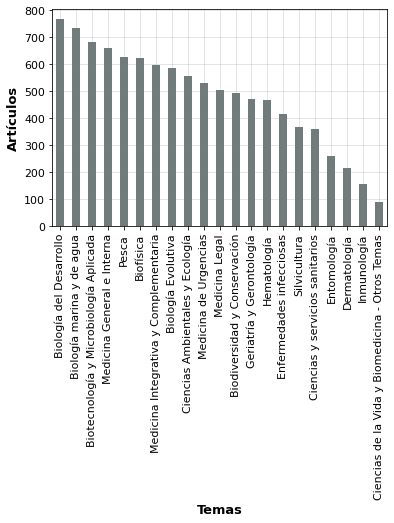

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
training['Research Areas'].value_counts().plot(kind='bar', color=color)

ax.yaxis.grid(True, color="grey", alpha=0.25)
ax.xaxis.grid(True, color="grey", alpha=0.25)


plt.xlabel('Temas', fontdict=fuente)
plt.ylabel('Artículos', fontdict=fuente)

plt.xticks(fontsize=11, family='sans-serif', rotation=90)
plt.yticks(fontsize=11, family='sans-serif')


plt.savefig("/content/drive/MyDrive/Ciencias de la Vida y Biomedicina/resoltion.png",dpi=300)

plt.show()


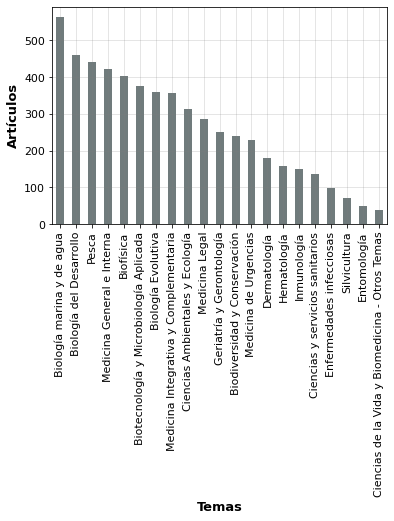

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
test['Research Areas'].value_counts().plot(kind='bar', color=color)

ax.yaxis.grid(True, color="grey", alpha=0.25)
ax.xaxis.grid(True, color="grey", alpha=0.25)



plt.title("", fontdict=fuente1)
plt.xlabel('Temas', fontdict=fuente)
plt.ylabel('Artículos', fontdict=fuente)

plt.xticks(fontsize=11, family='sans-serif', rotation=90)
plt.yticks(fontsize=11, family='sans-serif')


plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
model= make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(training['Abstract'].values.astype('U'),
         training['Research Areas'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
predict= model.predict(test['Abstract'].values.astype('U'))
predict

array(['Biodiversidad y Conservación', 'Biodiversidad y Conservación',
       'Biodiversidad y Conservación', ..., 'Medicina General e Interna',
       'Medicina General e Interna',
       'Medicina Integrativa y Complementaria'], dtype='<U47')

In [ ]:
from sklearn.metrics import classification_report

print (classification_report(test['Research Areas'],
                            predict))

                                                 precision    recall  f1-score   support

                   Biodiversidad y Conservación       0.98      0.38      0.54       241
                                      Biofísica       0.95      0.95      0.95       402
                             Biología Evolutiva       0.83      0.93      0.88       361
                        Biología del Desarrollo       0.66      0.97      0.79       460
                      Biología marina y de agua       0.65      0.94      0.77       564
         Biotecnología y Microbiología Aplicada       0.83      0.93      0.87       376
                Ciencias Ambientales y Ecología       0.75      0.85      0.80       314
Ciencias de la Vida y Biomedicina - Otros Temas       0.00      0.00      0.00        39
                Ciencias y servicios sanitarios       0.96      0.40      0.57       135
                                   Dermatología       1.00      0.01      0.01       179
                    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(0.5, 1.0, '')

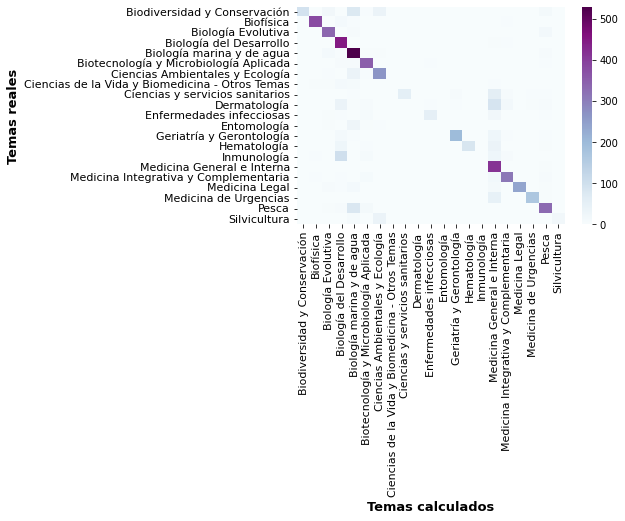

In [ ]:
import seaborn as sns

mat = confusion_matrix(test['Research Areas'],predict)

r=sns.heatmap(mat, cmap='BuPu', xticklabels=temas, yticklabels=temas)
plt.xlabel('Temas calculados', fontdict=fuente)
plt.ylabel('Temas reales', fontdict=fuente)

plt.xticks(fontsize=11, family='sans-serif')
plt.yticks(fontsize=11, family='sans-serif')

r.set_title('')

In [ ]:
data_df = pd.DataFrame(predict)

In [ ]:
df2=df2.assign(TemasCalculados=data_df.values)

In [ ]:
df2

,Unnamed: 0,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 69,TemasCalculados
0,8238,J,"Espinola-Novelo, JF; Gonzalez-Salasi, C; Guill...",NaN,NaN,NaN,"Espinola-Novelo, Juan F.; Gonzalez-Salasi, Car...",NaN,NaN,Metazoan parasites of Mycteroperca bonaci (Epi...,REVISTA MEXICANA DE BIODIVERSIDAD,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,ectoparasites; endoparasites; marine fish; arr...,SP. N. MONOGENEA; HELMINTH-PARASITES; LUTJANUS...,"Samples of black grouper, Mycteroperca bonaci,...","[Espinola-Novelo, Juan F.; Gonzalez-Salasi, Ca...",NaN,"Guillen-Hernandez, S (corresponding author), U...",ghernand@uady.mx,"Guillen-Hernandez, Sergio/F-7225-2019","Guillen-Hernandez, Sergio/0000-0002-8419-6092;...",Project Promep [103.25/2575]; Royal Society of...,This study was funded by the Project Promep 10...,NaN,45,9,9,0,18,"INST BIOLOGIA, UNIV NACIONAL AUTONOMA MEXICO",MEXICO,"APARTADO POSTAL 70-233, MEXICO, D F 00000, MEXICO",1870-3453,NaN,NaN,REV MEX BIODIVERS,Rev. Mex. Biodivers.,DEC,2013,84,4,NaN,NaN,NaN,NaN,1111,1120,NaN,10.7550/rmb.27989,NaN,NaN,10,Biodiversity Conservation,Science Citation Index Expanded (SCI-EXPANDED),Biodiversidad y Conservación,296CG,WOS:000330162100007,NaN,"Green Published, gold",NaN,NaN,16/02/2022,NaN,Biodiversidad y Conservación
1,8239,J,"Pinto, HA; Mati, VLT; de Melo, AL",NaN,NaN,NaN,"Pinto, Hudson Alves; Tenorio Mati, Vitor Luis;...",NaN,NaN,New records and a checklist of trematodes from...,REVISTA MEXICANA DE BIODIVERSIDAD,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Brazil; Clinostomidae; Digenea; Diplostomidae;...,CENTROCESTUS-FORMOSANUS NISHIGORI; OF-NATURAL-...,Seven species of trematodes were identified du...,"[Pinto, Hudson Alves; Tenorio Mati, Vitor Luis...",NaN,"Pinto, HA (corresponding author), Univ Fed Min...",hudsonalves13@ig.com.br,"Mati, Vitor Luis/D-1976-2014; Pinto, Hudson/AA...","Pinto, Hudson/0000-0002-5519-1348; de Melo, Al...",NaN,NaN,NaN,91,11,11,1,15,"INST BIOLOGIA, UNIV NACIONAL AUTONOMA MEXICO",MEXICO,"APARTADO POSTAL 70-233, MEXICO, D F 00000, MEXICO",1870-3453,2007-8706,NaN,REV MEX BIODIVERS,Rev. Mex. Biodivers.,DEC,2013,84,4,NaN,NaN,NaN,NaN,1100,1110,NaN,10.7550/rmb.34431,NaN,NaN,11,Biodiversity Conservation,Science Citation Index Expanded (SCI-EXPANDED),Biodiversidad y Conservación,296CG,WOS:000330162100006,NaN,gold,NaN,NaN,16/02/2022,NaN,Biodiversidad y Conservación
2,8240,J,"Boff, S; Araujo, AC; Pott, A",NaN,NaN,NaN,"Boff, Samuel; Araujo, Andrea Cardoso; Pott, Ar...",NaN,NaN,Bees (Hymenoptera: Apoidea) and flowers in nat...,BIOTA NEOTROPICA,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,bees; floral visitors; forest fragments; surveys,COMMUNITY HYMENOPTERA; AFRICANIZED HONEYBEES; ...,This is the first systematic survey of bees in...,"[Boff, Samuel] Univ Fed Mato do Grosso UFMS, P...",NaN,"Boff, S (corresponding author), Univ Fed Mato ...",samboff@gmail.com,"Araujo, Andréa Cardoso/D-9439-2013","Araujo, Andréa Cardoso/0000-0003-0394-2012; Po...",CAPES (Coordenacao de Aperfeicoamento de Pesso...,We thank

In [ ]:
df2.to_csv('/content/drive/MyDrive/Ciencias de la Vida y Biomedicina/prueba.csv', encoding='latin8')